In [5]:
import numpy as np
import pandas as pd
from modules import monthly_bias_correction
import os
import concurrent.futures
import traceback
from tqdm import tqdm

In [6]:
# Path to data
path = r"F:\Reanalysis Data\Monthly\Combined\ASSESS ESM 15"

# Get all station file paths
station_files = [os.path.join(path, file)
                 for file in os.listdir(path) if file.endswith('.csv')]

# Read all station CSVs into DataFrames
stations_df = [pd.read_csv(file, index_col=0, parse_dates=True)
               for file in station_files]

C:\Users\Acer\AppData\Local\Temp\ipykernel_5564\3887080572.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stations_df = [pd.read_csv(file, index_col=0, parse_dates=True)


In [7]:
df = stations_df[1]
df.head()

,DISTRICT,LATITUDE,LONGITUDE,Test MSE (lr),Test MSE (xgb),Test R2 (lr),Test R2 (xgb),Train MSE (lr),Train MSE (xgb),Train R2 (lr),Train R2 (xgb),UPAZILA,WELL ID,downscaled_hist_lr,downscaled_hist_xgb,downscaled_ssp_245_lr,downscaled_ssp_245_xgb,downscaled_ssp_585_lr,downscaled_ssp_585_xgb,wtable
1980-01-01,Barguna,22.32,90.3275,0.034066,0.03295,0.733681,0.742409,0.036924,0.037522,0.758719,0.75481,Bamna,GT0419003,2.133680,2.119114,NaN,NaN,NaN,NaN,2.0925
1980-02-01,Barguna,22.32,90.3275,0.034066,0.03295,0.733681,0.742409,0.036924,0.037522,0.758719,0.75481,Bamna,GT0419003,2.178187,2.025248,NaN,NaN,NaN,NaN,2.1550
1980-03-01,Barguna,22.32,90.3275,0.034066,0.03295,0.733681,0.742409,0.036924,0.037522,0.758719,0.75481,Bamna,GT0419003,2.226468,2.113871,NaN,NaN,NaN,NaN,2.0260
1980-04-01,Barguna,22.32,90.3275,0.034066,0.03295,0.733681,0.742409,0.036924,0.037522,0.758719,0.75481,Bamna,GT0419003,2.101389,2.110234,NaN,NaN,NaN,NaN,1.9325
1980-05-01,Barguna,22.32,90.3275,0.034066,0.03295,0.733681,0.742409,0.036924,0.037522,0.758719,0.75481,Bamna,GT0419003,1.878745,2.012129,NaN,NaN,NaN,NaN,1.6550


In [8]:
y = monthly_bias_correction(df['wtable'], df['downscaled_hist_xgb'])

<Axes: ylabel='Frequency'>

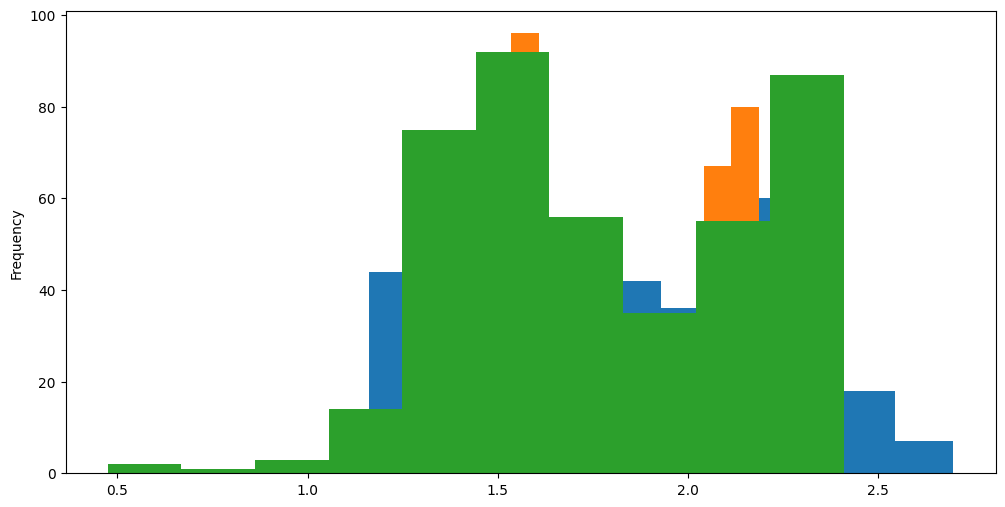

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
df['wtable'].dropna().plot(kind="hist", ax=ax) 
df['downscaled_hist_xgb'].dropna().plot(kind="hist", ax=ax)
y.dropna().plot(kind="hist", ax=ax)